# Delicious food Analysis

## About Dataset
Content
- Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. 

- Given the diversity in soil, climate, culture, ethnic groups, and occupations, these cuisines vary substantially and use locally available spices, herbs, vegetables, and fruits. Indian food is also heavily influenced by religion, in particular Hinduism, cultural choices and traditions.

- This dataset consists of information about various Indian dishes, their ingredients, their place of origin, etc.

## 1. Importing the required libraries.

In [1]:
import numpy as np #linear algebra,to perform a wide variety of mathematical operations on arrays.
import pandas as pd # data processing,csv file by converting it into the DataFrame

import matplotlib.pyplot as plt # for visualization.
import seaborn as sns # for visualization.
import plotly.express as px  #for visualization.

import warnings
warnings.filterwarnings('ignore')

## 2. Loading the data into the data frame.

In [2]:
df=pd.read_csv("indian_food.csv")

In [3]:
# To display the top 5 rows 
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [4]:
# To display the bottom 5 rows
df.tail(5)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central
254,Pinaca,"Brown rice, fennel seeds, grated coconut, blac...",vegetarian,-1,-1,sweet,dessert,Goa,West


## 3. Exploratory Data Analysis Begins:
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

#### A) Checking the types of data.
info () method shows some of the characteristics of the data such as Column Name,No. of non-null values of our columns, Dtype of the data, and Memory Usage.

In [5]:
df.info()
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


Column Description

name : name of the dish

ingredients : main ingredients used

diet : type of diet - either vegetarian or non vegetarian

prep_time : preparation time

cook_time : cooking time

flavor_profile : flavor profile includes whether the dish is spicy, sweet, bitter, etc

course : course of meal - starter, main course, dessert, etc

state : state where the dish is famous or is originated

region : region where the state belongs

Presence of -1 in any of the columns indicates NaN value.

In this dataset,total 255 Entries and total 9 Columns. All the data types in the correct form, so we can not change the data type of any column.


#### B. Dropping the missing or null values

###### Are there any missing values?

In [6]:
#Pandas isnull () and notnull () methods are used to check and manage NULL values in a data frame.
print(df.isnull().values.any())

True


###### YES, there are missing values in the dataset.

In [7]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

- Empty cells are the most common and anticipated data cleaning problem.
- checking for any missing data points is the most important step.
- In python dataframe, check for empty cells can be performed using isnull() , further using the sum() function to get an overall sum of the empty values.

In [8]:
df['region'].fillna('-1',inplace=True)  #fillna function replace only the null values
#df.isnull().sum()/len(df)*100

In [9]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

In [10]:
print(df.isnull().values.any())

False


In [11]:
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


#### C.Handling Duplicates values:

Are there any duplicated values?

In [12]:
df.duplicated().sum()

0

###### No , there is no duplicated values in the dataset 

##### D.Rename column name:

In [13]:
df.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [14]:
#Pandas rename () method is used to rename any index, column or row.
df.rename(columns={'name':'Name','ingredients':'Ingredients','diet':'Diet_Type','prep_time':'Prep_Time','cook_time':'Cook_Time','flavor_profile':'Flavor_Profile','course':'Course','state':'State','region':'Region'}, inplace=True)

In [15]:
df.columns

Index(['Name', 'Ingredients', 'Diet_Type', 'Prep_Time', 'Cook_Time',
       'Flavor_Profile', 'Course', 'State', 'Region'],
      dtype='object')

##### E.Changing Diet_Type name:

In [16]:
df.loc[df['Diet_Type'] == "vegetarian", "Diet_Type"] = "Veg"

In [17]:
df.loc[df['Diet_Type'] == "non vegetarian", "Diet_Type"] = "Non Veg"

##### F.Rearrange the column of dataframe by column name:

In [18]:
df = df[['Name', 'Ingredients', 'Diet_Type', 'Prep_Time', 'Cook_Time', 'Course',
       'Flavor_Profile', 'State', 'Region']]

In [19]:
df.head()

,Name,Ingredients,Diet_Type,Prep_Time,Cook_Time,Course,Flavor_Profile,State,Region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",Veg,45,25,dessert,sweet,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",Veg,80,30,dessert,sweet,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",Veg,15,60,dessert,sweet,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",Veg,15,30,dessert,sweet,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",Veg,15,40,dessert,sweet,West Bengal,East


## 4) Visualization :
Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visuazlization tools provide an accessible way to see and understand trends, outliers, and patterns in data. Additionally, it provides an excellent way for employees or business owners to present data to non-technical audiences without confusion.

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Prep_Time,255.0,31.105882,72.554409,-1.0,10.0,10.0,20.0,500.0
Cook_Time,255.0,34.529412,48.265650,-1.0,20.0,30.0,40.0,720.0


### A.Analyzing the Name Column.

###### List down the dishesh with there details which are made in 10 minutes.

In [21]:
df[['Name','Diet_Type','Course']].loc[df['Cook_Time']==10]

,Name,Diet_Type,Course
78,Chapati,Veg,main course
169,Bajri no rotlo,Veg,main course
178,Kutchi dabeli,Veg,snack
190,Keri no ras,Veg,main course
195,Koshimbir,Veg,main course
207,Surnoli,Veg,snack
214,Khichu,Veg,snack


##### List down the dishesh with there details which are prepaire in 10 minutes.

In [22]:
Dishesh_Name=df.nlargest(10,'Prep_Time')
display(Dishesh_Name[['Name','Diet_Type','Flavor_Profile']])

,Name,Diet_Type,Flavor_Profile
114,Pindi chana,Veg,spicy
155,Puttu,Veg,-1
29,Misti doi,Veg,sweet
128,Dosa,Veg,spicy
130,Idli,Veg,spicy
144,Masala Dosa,Veg,spicy
48,Poornalu,Veg,sweet
66,Chak Hao Kheer,Veg,sweet
122,Tandoori Chicken,Non Veg,spicy
123,Tandoori Fish Tikka,Non Veg,spicy


### B.Analyzing the Diet_Type Column.

 Analyze the percentage of Veg and Non Veg Dishesh.

###### A pie chart helps organize and show data as a percentage of a whole.

In [23]:
df['Diet_Type'].value_counts()

Veg        226
Non Veg     29
Name: Diet_Type, dtype: int64

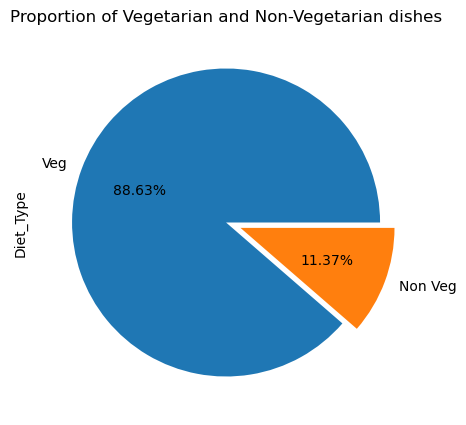

In [24]:
plt.figure(figsize=(5,5))
df['Diet_Type'].value_counts().plot.pie(autopct='%1.2f%%',explode=(0,0.1))
plt.title('Proportion of Vegetarian and Non-Vegetarian dishes')
plt.show()

- Vegetarian dishes consists 88.6% out of all the diets(Ofcourse higly imbalanced dependent variable).
- This pie chart shows  type of diet - either vegetarian or non vegetarian respectively.
- We use autopct which give values in percentage, and the syntax is '% 1.2f%%' where % sign at the start and end and the f works as pacemaker i.e weneed to put it by deafult and the 1 shows that 1 integer value we want and after that point(.)


### C.Number of dishes based on regions

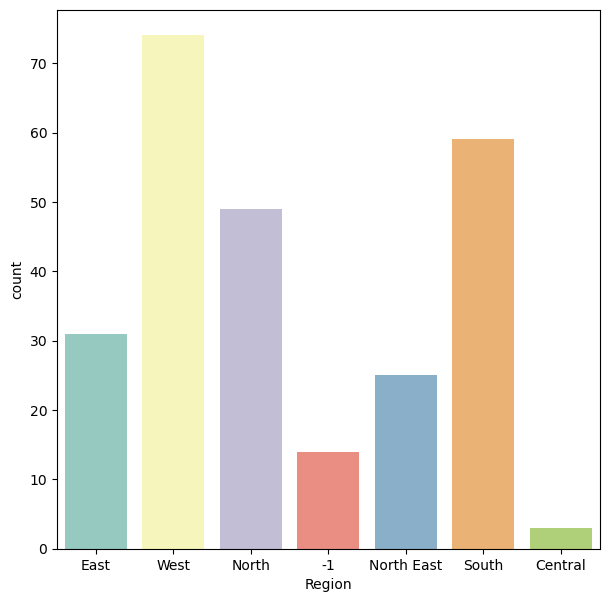

In [25]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x='Region',palette='Set3')
plt.title=('Number of dishes based on regions')
plt.show()

### D.Number of dishes based on courses of meal

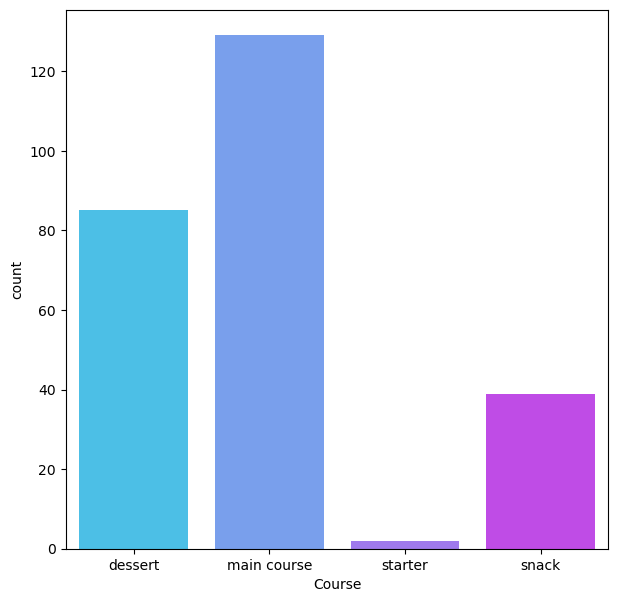

In [26]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x='Course',palette='cool')
plt.title=('Number of dishes based on courses of meal')
plt.show()

###### About 129 dishes are preferably eaten as a main course

### E.Proportion of Flavor Profiles

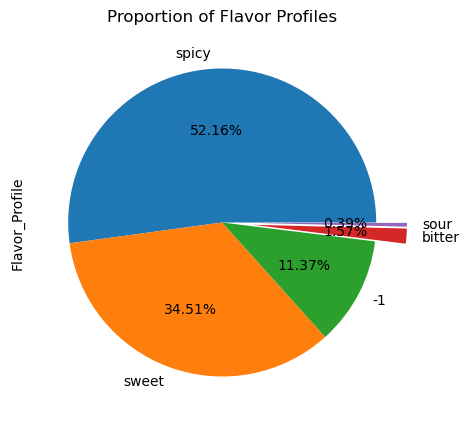

In [27]:
plt.figure(figsize=(5,5))
df['Flavor_Profile'].value_counts().plot.pie(autopct='%1.2f%%',explode=(0,0,0,0.2,0.2),title='Proportion of Flavor Profiles')
plt.show()

###### More than 50% of the dishes are spicy in flavor

### F.Analyze the state in diet type.

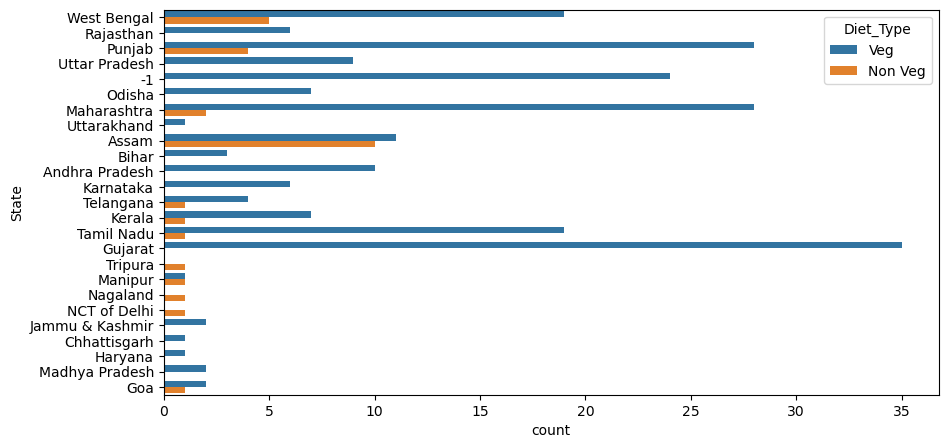

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,y='State',hue='Diet_Type')
plt.show()

##### We can see here,Gujrat is most vegeterian state.

### G.Find the co-relation between numerical values.

In [29]:
corr=df.corr()

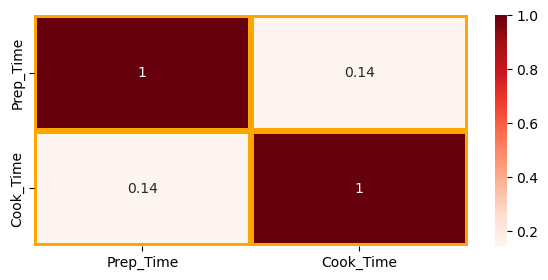

In [30]:
plt.figure(figsize=(7,3))
sns.heatmap(corr,annot=True,cmap='Reds',linewidth=4,linecolor='orange',cbar=True)
plt.show()

 - correlation close to 1---> +ve correlation-->1 variable increases other increases.
- correlation close to -1---> -ve correlation-->1 variable increases other decreases.
- correlation close to 0---> 0 correlation-->1 no relation betwwen variable.

### H.Histogram for preperation time

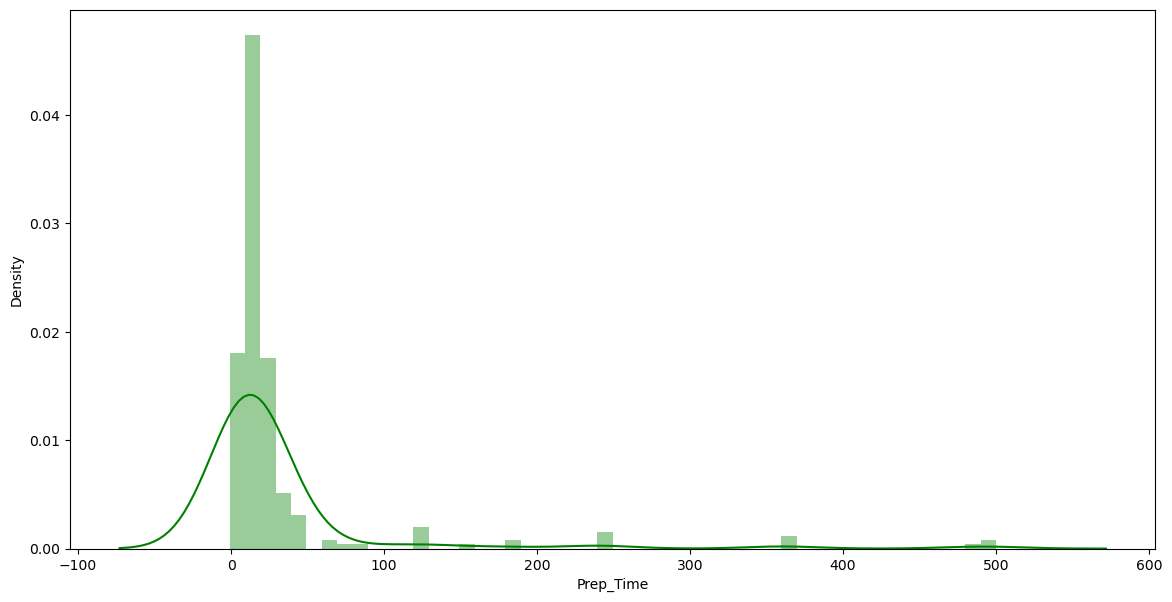

In [31]:
plt.figure(figsize=(14,7))
sns.distplot(df['Prep_Time'],color='green')
plt.show()

###### In the above histogram we can see some outliers, SO we want to remove this outliers using interqurtile methode.

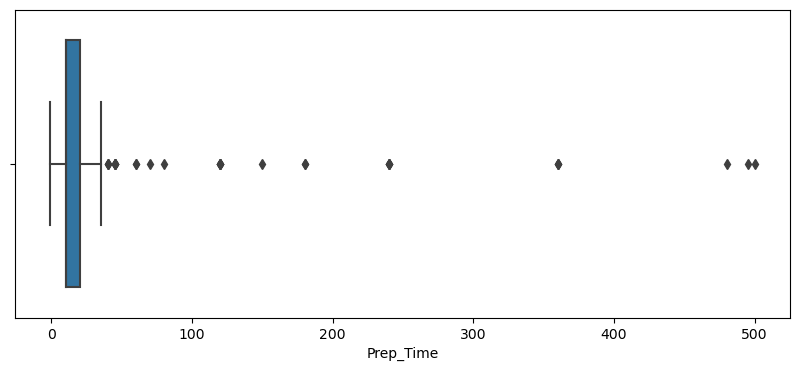

In [32]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df,x='Prep_Time')
plt.show()

In [33]:
q1=df.Prep_Time.quantile(0.25)
q1

10.0

In [34]:
q2=df.Prep_Time.quantile(0.50)
q2

10.0

In [35]:
q3=df.Prep_Time.quantile(0.75)
q3

20.0

In [36]:
m1=df.Prep_Time.quantile(0)
m1

-1.0

In [37]:
m2=df.Prep_Time.quantile(1)
m2

500.0

In [38]:
IQR=q3-q1
IQR

10.0

In [39]:
LF=q1-1.5*IQR
LF

-5.0

In [40]:
UF=q3+1.5*IQR
UF

35.0

In [41]:
df[df.Prep_Time>UF]

,Name,Ingredients,Diet_Type,Prep_Time,Cook_Time,Course,Flavor_Profile,State,Region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",Veg,45,25,dessert,sweet,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",Veg,80,30,dessert,sweet,Rajasthan,West
23,Cham cham,"Flour, cream, sugar, saffron, lemon juice, coc...",Veg,40,60,dessert,sweet,West Bengal,East
25,Ledikeni,"Chhena, sugar, ghee",Veg,45,45,dessert,sweet,West Bengal,East
29,Misti doi,"Milk, jaggery",Veg,480,30,dessert,sweet,West Bengal,East
30,Pantua,"Chhena, sugar, ghee, flour",Veg,45,45,dessert,sweet,West Bengal,East
33,Ras malai,"Chhena, reduced milk, pistachio",Veg,180,60,dessert,sweet,West Bengal,East
46,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jag...",Veg,180,60,main course,sweet,Karnataka,South
48,Poornalu,"Chana dal, jaggery",Veg,240,60,dessert,sweet,Andhra Pradesh,South
54,Kajjikaya,"Rice flour, jaggery, coconut",Veg,40,15,dessert,sweet,Andhra Pradesh,South


In [42]:
cleaned_Cook_Time=df[df.Prep_Time<UF]
cleaned_Cook_Time

,Name,Ingredients,Diet_Type,Prep_Time,Cook_Time,Course,Flavor_Profile,State,Region
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",Veg,15,60,dessert,sweet,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",Veg,15,30,dessert,sweet,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",Veg,15,40,dessert,sweet,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",Veg,10,50,dessert,sweet,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",Veg,10,50,dessert,sweet,Uttar Pradesh,North
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",Veg,5,30,dessert,sweet,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",Veg,20,60,dessert,sweet,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",Veg,-1,-1,dessert,sweet,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",Veg,20,45,dessert,sweet,Madhya Pradesh,Central


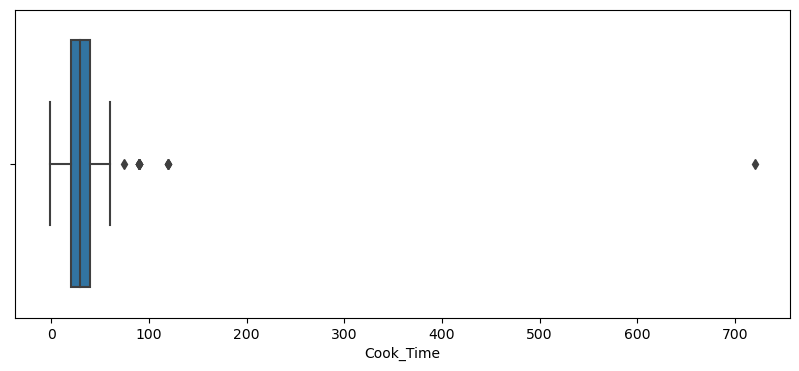

In [43]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df,x='Cook_Time')
plt.show()

## 5.Start with Machine Learning Association Rule.

### 1.Introduction
There are several methods for machine learning such as association, correlation, classification & clustering, this tutorial primarily focuses on learning using association rules. By association rules, we identify the set of ingredients that occur together in a dataset.

### 2.Association Rule Learning
The association rule learning is one of the very important concepts of machine learning,and it is employed in Market Basket analysis, Web usage mining, continuous production, etc. Here market basket analysis is a technique used by the various dishesh to discover the associations between ingredients.

Association rule learning can be divided into three types of algorithms:

1. Apriori

The Apriori Algorithm Work.
In order to select the interesting rules out of multiple possible rules from this small business scenario, we will be using the following measures[4]:

Support
Support of item x is nothing but the ratio of the number of transactions in which item x appears to the total number of transactions.

Confidence
Confidence (x => y) signifies the likelihood of the item y being purchased when item x is purchased. This method takes into account the popularity of item x.

Lift
Lift (x => y) is nothing but the ‘interestingness’ or the likelihood of the item y being purchased when item x is sold. Unlike confidence (x => y), this method takes into account the popularity of the item y.


Lift (x => y) = 1 means that there is no correlation within the itemset.

Lift (x => y) > 1 means that there is a positive correlation within the itemset, i.e., products in the itemset, x and y, are more likely to be bought together.

Lift (x => y) < 1 means that there is a negative correlation within the itemset, i.e., products in itemset, x and y, are unlikely to be bought together

2. Eclat

3. F-P Growth Algorithm


### 3.Problem Statement:
    
For the implementation of the Apriori algorithm, we are using data collected from a restaurant, where each row indicates all the dishesh using ingredients.

The manager of a restaurant is trying to find out an association rule between various dishesh, to figure out which ingredients are more often bought together so that he can keep the dishesh together in order to increase profit of restaurant. The dataset has 255 entries.

In [44]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [45]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [46]:
df=pd.read_csv("indian_food.csv")
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


### 4.Calculate the parameter of for aal the possible combinations

In [47]:
def breakdata(data):
    return data.split(",")

In [48]:
breakdata("Maida flour, oil, sugar")

['Maida flour', ' oil', ' sugar']

In [49]:
data=list(df["ingredients"].apply(breakdata))
#data=list(df['Product'].map(break_data))

In [50]:
data

[['Maida flour', ' yogurt', ' oil', ' sugar'],
 ['Gram flour', ' ghee', ' sugar'],
 ['Carrots', ' milk', ' sugar', ' ghee', ' cashews', ' raisins'],
 ['Flour',
  ' ghee',
  ' kewra',
  ' milk',
  ' clarified butter',
  ' sugar',
  ' almonds',
  ' pistachio',
  ' saffron',
  ' green cardamom'],
 ['Milk powder',
  ' plain flour',
  ' baking powder',
  ' ghee',
  ' milk',
  ' sugar',
  ' water',
  ' rose water'],
 ['Sugar syrup', ' lentil flour'],
 ['Maida',
  ' corn flour',
  ' baking soda',
  ' vinegar',
  ' curd',
  ' water',
  ' turmeric',
  ' saffron',
  ' cardamom'],
 ['Cashews', ' ghee', ' cardamom', ' sugar'],
 ['Milk', ' cottage cheese', ' sugar'],
 ['Milk', ' rice', ' sugar', ' dried fruits'],
 ['Gram flour', ' ghee', ' sugar'],
 ['Yogurt', ' milk', ' nuts', ' sugar'],
 ['Refined flour',
  ' besan',
  ' ghee',
  ' powdered sugar',
  ' yoghurt',
  ' green cardamom'],
 ['Firm white pumpkin', ' sugar', ' kitchen lime', ' alum powder'],
 ['Rice', ' sugar', ' nuts'],
 ['Condensed mil

In [51]:
from mlxtend.preprocessing import TransactionEncoder

In [52]:
te=TransactionEncoder()
enddata=te.fit_transform(data)

In [53]:
enddata

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [54]:
print(te.columns_)

['  jaggery', ' Dharwadi buffalo milk', ' Sugar', ' all purpose flour', ' almond', ' almonds', ' aloo', ' alum powder', ' amchur powder', ' arhar dal', ' arrowroot powder', ' atta', ' avocado oil', ' axone', ' baby potatoes', ' badam', ' baking powder', ' baking soda', ' banana', ' basmati rice', ' bay leaf', ' beans', ' beetroot', ' bell pepper', ' bell peppers', ' bengal gram flour', ' besan', ' bhatura', ' bhuna chana', ' biryani masala powder', ' bitter gourd', ' black pepper', ' black salt', ' black sesame seeds', ' blend rice', ' boiled potatoes', ' bombay rava', ' boondi', ' bread crumbs', ' brinjal', ' butter', ' cabbage', ' capsicum', ' cardamom', ' cardamom pods', ' cardamom powder', ' carrot', ' cashew nuts', ' cashews', ' cashews and raisins', ' chana daal', ' chana dal', ' chenna cheese', ' chia seed', ' chicken', ' chicken chunks', ' chickpea flour', ' chickpeas', ' chili powder', ' chilli', ' chillies', ' chopped tomatoes', ' cilantro', ' cinnamon', ' cinnamon stick', ' 

In [55]:
df=pd.DataFrame(enddata,columns=te.columns_)
df.replace(True,1,inplace=True)
df.replace(False,0,inplace=True)

In [56]:
df

,jaggery,Dharwadi buffalo milk,Sugar,all purpose flour,almond,almonds,aloo,alum powder,amchur powder,arhar dal,...,Tea leaves,Thin rice flakes,Tomato,Urad dal,Vermicelli pudding,Wheat flour,Whole wheat flour,Whole wheat rava,Yoghurt,Yogurt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Set a miniumum value of support and confindence

In [57]:
scores=apriori(df,min_support=0.02,use_colnames=True)  #use_colnames=False
scores

G:\ITVEDANT ASSINGMENT\PYTHON MODULE\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.027451,( all purpose flour)
1,0.027451,( baking soda)
2,0.027451,( bengal gram flour)
3,0.027451,( butter)
4,0.035294,( cardamom)
5,0.023529,( cashew nuts)
6,0.023529,( chillies)
7,0.035294,( clarified butter)
8,0.039216,( coconut)
9,0.023529,( cream)


In [58]:
score_ar=association_rules(scores,metric="confidence",min_threshold=0.5)
score_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( cardamom),( sugar),0.035294,0.172549,0.027451,0.777778,4.507576,0.021361,3.723529,0.806620
1,( mustard seeds),( curry leaves),0.035294,0.098039,0.023529,0.666667,6.800000,0.020069,2.705882,0.884146
2,( ghee),( sugar),0.098039,0.172549,0.058824,0.600000,3.477273,0.041907,2.068627,0.789855
3,( milk),( sugar),0.058824,0.172549,0.031373,0.533333,3.090909,0.021223,1.773109,0.718750
4,( saffron),( sugar),0.039216,0.172549,0.023529,0.600000,3.477273,0.016763,2.068627,0.741497
5,(Chana dal),( urad dal),0.043137,0.066667,0.031373,0.727273,10.909091,0.028497,3.422222,0.949283


In [59]:
score_ar.nlargest(n = 10, columns = "lift")

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(Chana dal),( urad dal),0.043137,0.066667,0.031373,0.727273,10.909091,0.028497,3.422222,0.949283
1,( mustard seeds),( curry leaves),0.035294,0.098039,0.023529,0.666667,6.800000,0.020069,2.705882,0.884146
0,( cardamom),( sugar),0.035294,0.172549,0.027451,0.777778,4.507576,0.021361,3.723529,0.806620
2,( ghee),( sugar),0.098039,0.172549,0.058824,0.600000,3.477273,0.041907,2.068627,0.789855
4,( saffron),( sugar),0.039216,0.172549,0.023529,0.600000,3.477273,0.016763,2.068627,0.741497
3,( milk),( sugar),0.058824,0.172549,0.031373,0.533333,3.090909,0.021223,1.773109,0.718750


### This is the final result of our apriori implementation in python.